In [5]:
import pandas as pd

# Load datasets
train_df = pd.read_csv('Titanic_train.csv')
test_df = pd.read_csv('Titanic_test.csv')

# Preview and summary
print(train_df.head())
print(train_df.info())
print(train_df.describe())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

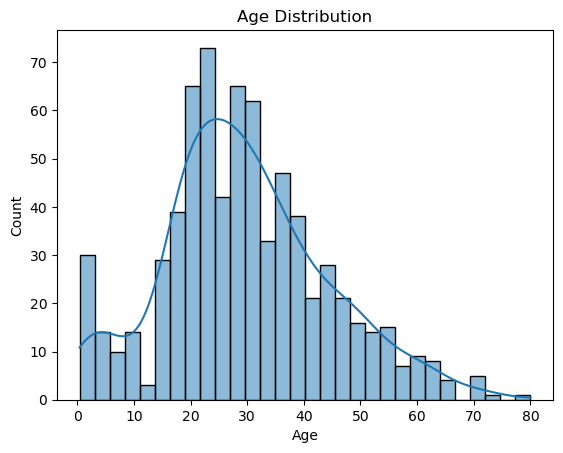

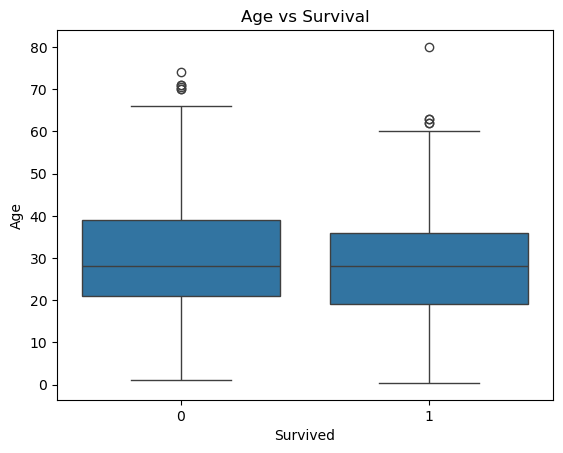

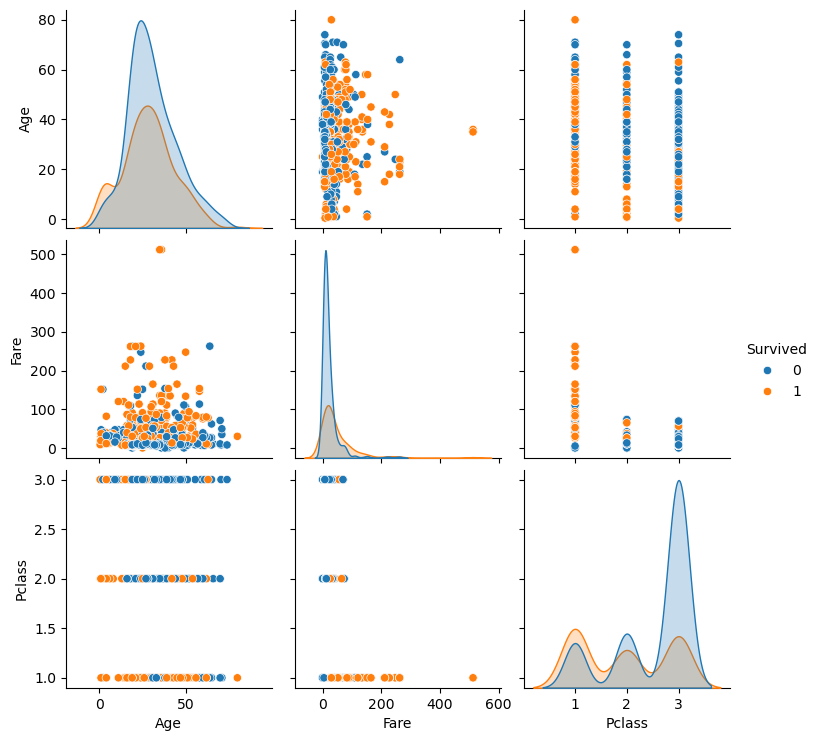

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for Age
sns.histplot(train_df['Age'].dropna(), bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

# Boxplot: Age vs Survived
sns.boxplot(x='Survived', y='Age', data=train_df)
plt.title("Age vs Survival")
plt.show()

# Pairplot for numerical features
sns.pairplot(train_df[['Survived', 'Age', 'Fare', 'Pclass']], hue='Survived')
plt.show()


In [7]:
# Fill missing Age with median
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)

# Fill missing Embarked with mode
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
test_df['Embarked'].fillna(test_df['Embarked'].mode()[0], inplace=True)

# Fill missing Fare in test
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)


C:\Users\srush\AppData\Local\Temp\ipykernel_11584\913692234.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
C:\Users\srush\AppData\Local\Temp\ipykernel_11584\913692234.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [8]:
# Drop unnecessary columns
train_df = train_df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)
test_ids = test_df['PassengerId']  # save for final prediction
test_df = test_df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)

# Encode categorical variables
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Sex', 'Embarked'], drop_first=True)


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Features and target
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

# Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Predictions
y_pred = model.predict(X_val)
y_prob = model.predict_proba(X_val)[:, 1]

# Metrics
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))
print("ROC AUC Score:", roc_auc_score(y_val, y_prob))


Accuracy: 0.8100558659217877
Precision: 0.7857142857142857
Recall: 0.7432432432432432
F1 Score: 0.7638888888888888
ROC AUC Score: 0.8824967824967825


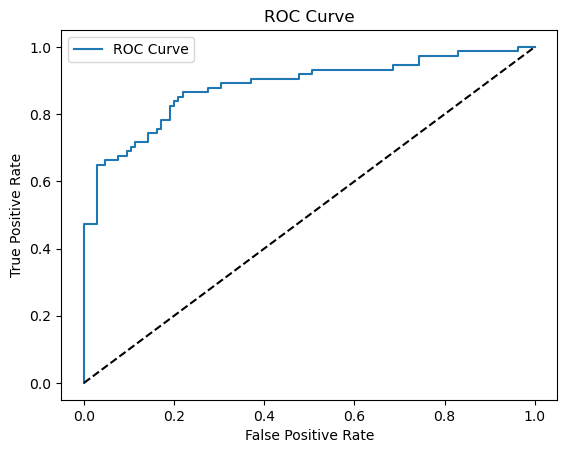

In [11]:
fpr, tpr, _ = roc_curve(y_val, y_prob)
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [12]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print(coefficients)


      Feature  Coefficient
4        Fare     0.002578
1         Age    -0.030579
3       Parch    -0.108310
6  Embarked_Q    -0.112689
2       SibSp    -0.295236
7  Embarked_S    -0.399760
0      Pclass    -0.938262
5    Sex_male    -2.591560


In [13]:
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# X and y assumed to be ready from your preprocessing step
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Save model using pickle
with open('logistic_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved successfully using pickle!")




Model saved successfully using pickle!


In [14]:
# Load model using pickle
with open('logistic_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Predict and evaluate
y_pred = loaded_model.predict(X_val)
print(classification_report(y_val, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

